In [18]:
import numpy as np # linear algebra
import pandas as pd
from numpy.random import randn


In [19]:
df = pd.read_csv(r'/kaggle/input/medical/KaggleV2-May-2016.csv')

In [20]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [21]:
df.shape

(110527, 14)

In [22]:
pd.set_option('future.no_silent_downcasting', True)
df.replace({'Gender': {'M':0,'F':1}, 'No-show': {'Yes':1,'No':0}}, inplace=True)

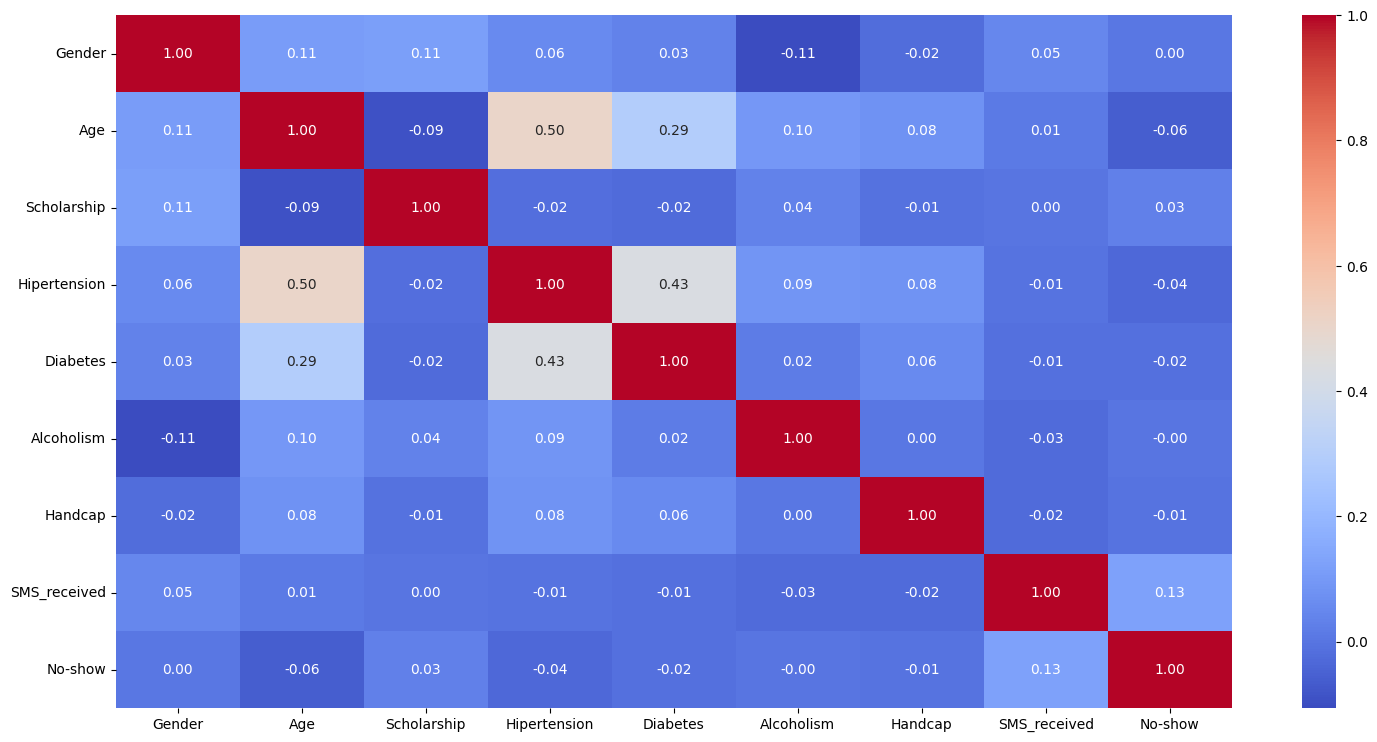

No-show         1.000000
SMS_received    0.126431
Scholarship     0.029135
Gender          0.004119
Alcoholism     -0.000196
Handcap        -0.006076
Diabetes       -0.015180
Hipertension   -0.035701
Age            -0.060319
Name: No-show, dtype: float64


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df[['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']].corr()
corr_with_noshow = corr["No-show"].sort_values(ascending=False)
plt.figure(figsize=(18,9))
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt=".2f")
plt.show()
print(corr_with_noshow)

In [24]:
x= df[['Age','Hipertension','Diabetes','Handcap','Gender','Scholarship','SMS_received']]
y=df['No-show']

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
y_train = y_train.astype(int)
x_train = x_train.astype(int)
y_test = y_test.astype(int)
x_test = x_test.astype(int)

# Part 1- Neural Network from scratch

In [27]:

class ANN:
    def __init__(self, input_size=7, hidden_size=50):
        # Initialize weights and biases
        self.input_weights = np.random.uniform(-0.5, 0.5, size=(input_size, hidden_size)).astype(np.float32)
        self.output_weights = np.random.uniform(-0.5, 0.5, size=(hidden_size, 1)).astype(np.float32)
        self.b1 = np.random.uniform(-0.5, 0.5, size=hidden_size).astype(np.float32)
        self.b2 = np.random.uniform(-0.5, 0.5, size=1).astype(np.float32)

    def ReLU(self,z):
        return np.maximum(0,z)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, x, y): 

        # Hidden layer activations
        z = x @ self.input_weights + self.b1
        h = self.ReLU(z)
        # Output layer activation
        net_out = h @ self.output_weights + self.b2
        out = self.sigmoid(net_out)
        return out,h
        
        
    

    def backward(self, x, y, lr=0.01): 
        out,h = self.forward(x,y) 
        y = y.astype(np.float32) 
        out = out.astype(np.float32) 
        
        # Gradients for output layer 
        d_out=np.zeros_like(out)
        d_out = (y.to_numpy().reshape(out.shape) - out) * out * (1 - out)
        grad_output_weights = h.T @ d_out 
        grad_b2 = np.sum(d_out, axis=0) 
       
        # Gradients for hidden layer 
        d_h = (d_out @ self.output_weights.T) * h * (1 - h) 
        grad_input_weights = x.T @ d_h 
        grad_b1 = np.sum(d_h, axis=0) 
        
        # Update weights and biases 
        self.output_weights += lr * grad_output_weights 
        self.b2 += lr * grad_b2 
        self.input_weights += lr * grad_input_weights 
        self.b1 += lr * grad_b1
        
    def predict(self, x):
         
        # Hidden layer activations
        z = x @ self.input_weights + self.b1
        h = self.ReLU(z)
        # Output layer activation
        net_out = h @ self.output_weights + self.b2
        out = self.sigmoid(net_out)
        out = (out > 0.5).astype(int)
        return out


In [31]:
import time

start_time = time.time()
ann_model = ANN()
ann_model.forward(x_train,y_train)
for i in range(500):
    ann_model.backward(x_train, y_train)
end_time = time.time()
print(f'convergence time:{end_time-start_time}')

convergence time:105.78888058662415


In [32]:
y_pred = ann_model.predict(x_test)


In [33]:
y_pred,y_test

(        0
 84674   0
 3635    0
 16605   0
 103942  0
 274     0
 ...    ..
 28970   0
 20956   0
 61885   0
 36930   0
 42594   0
 
 [22106 rows x 1 columns],
 84674     0
 3635      0
 16605     1
 103942    1
 274       0
          ..
 28970     0
 20956     0
 61885     0
 36930     1
 42594     0
 Name: No-show, Length: 22106, dtype: int64)

In [34]:
y_pred = y_pred.astype(int)

In [35]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,precision_score, recall_score, auc

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

#PR-AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
pr_auc = auc((recall,1),(precision,1))
print("pr_auc:\n", pr_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7992852619198407
F1-score: 0.0
pr_auc:
 0.5
Confusion Matrix:
 [[17669     0]
 [ 4437     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part 2- Using Pytorch

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  # Hidden Layer
        self.layer2 = nn.Linear(hidden_size, output_size)  # Output Layer

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.layer1(x))  # Hidden layer activation
        x = self.layer2(x)  # Output layer WITHOUT sigmoid
        return x


input_size = x_train.shape[1]
output_size = 1
hidden_size = 50

model = SimpleNN(input_size, hidden_size, output_size)

# Define Loss function and Optimizer

criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([5.0]))  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)   # Stochastic Gradient Descent

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x_train.values, dtype=torch.float32)  # Convert DataFrame to Tensor
y_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_tensor = y_tensor.view(-1, 1) 
x_tensor_test = torch.tensor(x_test.values, dtype=torch.float32)  
y_tensor_test = torch.tensor(y_test.values, dtype=torch.float32)



# Training loop
start_time = time.time()
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()  # Clear previous gradients
    output = model(x_tensor)  # Forward pass
    loss = criterion(output, y_tensor)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights    

    if epoch % 100 == 0:  # Print progress every 100 epochs
        print(f"Epoch {epoch}, Loss: {loss.item()}")

end_time = time.time()
print(f'convergence time:{end_time-start_time}')

# Making predictions
predictions = model(x_tensor_test).detach().numpy()
print("Predictions:", predictions)
pytorch_y_pred = (predictions >= 0.5).astype(int)
print("Thresholded Predictions:", (predictions >= 0.5).astype(int))

Epoch 0, Loss: 2.7135729789733887
Epoch 100, Loss: 1.2344157695770264
Epoch 200, Loss: 1.231236457824707
Epoch 300, Loss: 1.2306253910064697
Epoch 400, Loss: 1.2305433750152588
Epoch 500, Loss: 1.2305066585540771
Epoch 600, Loss: 1.2304697036743164
Epoch 700, Loss: 1.2304221391677856
Epoch 800, Loss: 1.23035728931427
Epoch 900, Loss: 1.2302939891815186
convergence time:30.860594272613525
Predictions: [[0.4975993 ]
 [0.28847474]
 [0.27617282]
 ...
 [0.63863635]
 [0.28649467]
 [0.14731716]]
Thresholded Predictions: [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [39]:
# Accuracy
acc = accuracy_score(y_test, pytorch_y_pred)
print("Accuracy:", acc)

# F1-score
f1 = f1_score(y_test, pytorch_y_pred)
print("F1-score:", f1)

#PR-AUC
precision = precision_score(y_test, pytorch_y_pred)
recall = recall_score(y_test,pytorch_y_pred)
pr_auc = auc((recall,1),(precision,1))
print("pr_auc:\n", pr_auc)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pytorch_y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7474441328146204
F1-score: 0.18532029767984826
pr_auc:
 0.5410507032225998
Confusion Matrix:
 [[15888  1781]
 [ 3802   635]]
